# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [77]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-12-16 14:49:10--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2024-12-16 14:49:10 (4.29 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [79]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,807,103,51,105,174,56,11,210,32,24,163,222,650,222,73,8,9,187,196
1,499,102,54,98,167,53,10,217,31,24,174,228,692,223,72,0,31,187,198
2,497,94,43,82,136,54,10,155,43,19,149,176,359,161,74,1,6,186,197
3,53,101,42,62,175,67,6,149,43,19,139,169,341,165,65,7,11,202,209
4,19,101,56,100,215,69,10,208,32,24,169,227,651,223,74,6,5,186,193
5,436,93,42,64,123,51,7,135,51,18,144,164,262,155,78,16,12,185,185
6,792,100,51,104,163,52,10,206,32,23,164,217,631,193,69,5,21,188,196
7,430,104,53,108,206,61,11,217,31,24,168,226,694,209,67,0,9,188,201
8,831,100,47,70,185,70,7,162,40,20,153,179,406,172,68,9,6,200,205
9,554,113,48,98,208,62,9,203,33,23,151,216,613,183,64,17,29,193,204


Methods `describe` and `info` deliver some useful information.

In [80]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.622951,93.597450,44.850638,81.440801,168.639344,61.863388,8.546448,168.561020,41.067395,20.566485,147.905282,188.577413,439.289617,175.136612,72.741348,6.284153,12.786885,188.870674,195.531876
std,246.753612,8.170406,6.126964,15.981246,33.735678,8.340906,5.173287,34.088153,7.998461,2.658420,14.435932,32.849468,181.247909,32.444584,7.994441,4.881754,9.200728,6.218617,7.537339
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,316.000000,149.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,418.000000,93.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,363.000000,174.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,630.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,597.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [81]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [82]:
### Из X_train_pd.describe() видно, что диапазоны признаков сильно различаются, необходимо применить нормализацию

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled.shape

### Масштабирование обеспечивает равное влияние признаков на модель,
### особенно для алгоритмов, зависящих от расстояний,
### таких как k-ближайшие соседи (k-NN) или метод опорных векторов (SVM)

(549, 19)

In [83]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-9.868649e-17,7.118370e-16,-2.556142e-16,3.526829e-16,-2.426717e-17,-2.653211e-16,5.338777e-17,-2.394361e-16,-1.876661e-16,-1.003043e-16,-1.213358e-16,-3.995994e-16,6.794808e-17,-1.763414e-16,8.396441e-16,-5.985902e-17,-1.083934e-16,-6.082971e-16,-2.750279e-16
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.706182e+00,-2.155768e+00,-1.935942e+00,-2.595454e+00,-1.917800e+00,-1.783612e+00,-1.073110e+00,-1.660771e+00,-1.885505e+00,-1.342804e+00,-2.073476e+00,-1.784834e+00,-1.409795e+00,-2.040308e+00,-1.720431e+00,-1.288448e+00,-1.391036e+00,-2.071588e+00,-1.929743e+00
25%,-8.705797e-01,-8.082177e-01,-7.924089e-01,-7.165421e-01,-8.497076e-01,-5.836084e-01,-4.926792e-01,-6.624470e-01,-1.009538e+00,-5.897914e-01,-7.561152e-01,-6.574564e-01,-6.808468e-01,-8.063117e-01,-5.936215e-01,-8.783852e-01,-7.383192e-01,-7.839550e-01,-7.345989e-01
50%,-1.063953e-02,-7.319033e-02,-1.389617e-01,-1.528684e-01,-1.896886e-02,-1.036069e-01,-1.057251e-01,-3.394600e-01,2.418424e-01,-2.132850e-01,-1.321023e-01,-3.527598e-01,-4.212970e-01,-3.506436e-02,-9.281750e-02,-2.632915e-01,-1.943884e-01,-1.401385e-01,6.216395e-02
75%,8.493006e-01,6.618370e-01,6.778474e-01,9.118486e-01,7.524314e-01,3.763947e-01,2.812289e-01,8.937633e-01,6.172567e-01,9.162341e-01,7.692497e-01,8.660264e-01,8.709298e-01,6.744832e-01,4.079865e-01,5.568335e-01,6.759009e-01,6.646320e-01,7.261330e-01
max,1.721410e+00,3.111928e+00,2.311465e+00,1.788674e+00,4.876456e+00,9.136423e+00,8.987694e+00,2.831686e+00,2.494328e+00,3.175272e+00,2.779958e+00,4.004401e+00,3.195834e+00,2.864826e+00,7.794846e+00,3.222240e+00,2.960410e+00,2.757035e+00,2.054071e+00


In [84]:
### Распределение классов следует проанализировать, чтобы выявить проблемы с дисбалансом.
pd.Series(y_train).value_counts()

,count
bus,147
saab,144
van,131
opel,127


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [85]:
! pip install scipy==1.11.4
#import scipy
! pip install scikit-plot
#print(scipy. ＿version＿)

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_

In [86]:
# Используется логистическая регрессия (LogisticRegression):
# Настройка гиперпараметров через GridSearchCV: penalty: Тип регуляризации (l1 или l2). Инверсия коэффициента регуляризации, задаётся в логарифмической шкале.Кросс-валидация с 5 фолдами.
# После поиска лучших параметров (best_params_) выбирается оптимальная модель.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0, 4, 10)
}

clf = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5)
best_model = clf.fit(X_train_scaled , y_train)
best_estimator = best_model.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

In [87]:
print("Best Hyperparameters:", best_model.best_params_)

Best Hyperparameters: {'C': 7.742636826811269, 'penalty': 'l2'}


In [88]:
#Accuracy: Доля правильных предсказаний.
#F1 Score: Усреднённая гармоническая оценка точности (precision) и полноты (recall) для всех классов.
import sklearn
y_pred = best_estimator.predict(X_train_scaled )
accuracy_score = sklearn.metrics.accuracy_score(y_train, y_pred)
f1_score = sklearn.metrics.f1_score(y_train, y_pred, average='weighted')
print(f"F1 Score: {f1_score}")
print(f"Accuracy: {accuracy_score}")

F1 Score: 0.8431366308695377
Accuracy: 0.8451730418943534


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

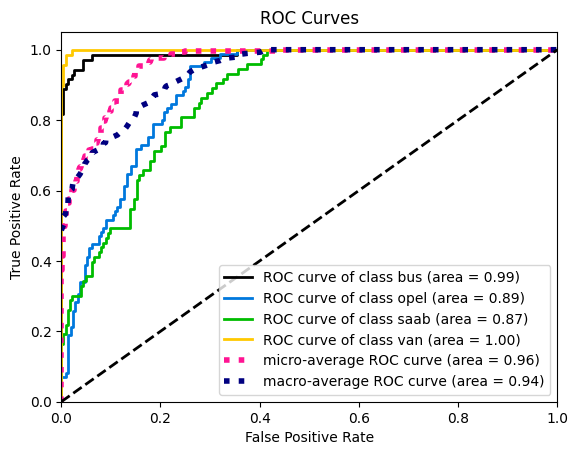

In [89]:
#ROC-кривая показывает соотношение между долей истинно положительных и ложных положительных классификаций при различных порогах
import scikitplot
predicted_proba = best_estimator.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, predicted_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [90]:
# шаг понижения размерности с использованием метода главных компонент (PCA)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

In [91]:
#график зависимости дисперсии от количества компонент PCA
import plotly.express as px

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={'x': '# of components', 'y': 'explained variance'},
    title='Cumulative Explained Variance vs Number of PCA Components'
)


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [92]:
# так как нам нужно не менее 80 процентов дисперсии, оставляем 4 признака
# минимальное число компонент, объясняющих хотя бы 80% дисперсии
pca = PCA(n_components=4)
X_train_decomposed = pca.fit_transform(X_train_scaled )
X_test_decomposed = pca.fit_transform(X_test_scaled )

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [93]:
log_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0, 4, 10)
}

clf = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5)
best_model_decomposed = clf.fit(X_train_decomposed , y_train)
best_estimator_decomposed = best_model_decomposed.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

In [94]:
print("Best Hyperparameters:", best_model_decomposed.best_params_)

Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}


In [95]:
# Модель оценивается на тренировочных данных после PCA
import sklearn
y_pred_decomposed = best_estimator_decomposed.predict(X_train_decomposed)
accuracy_score = sklearn.metrics.accuracy_score(y_train, y_pred_decomposed)
f1_score = sklearn.metrics.f1_score(y_train, y_pred_decomposed, average='weighted')
print(f"F1 Score: {f1_score}")
print(f"Accuracy: {accuracy_score}")

F1 Score: 0.43408476970000803
Accuracy: 0.44990892531876137


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

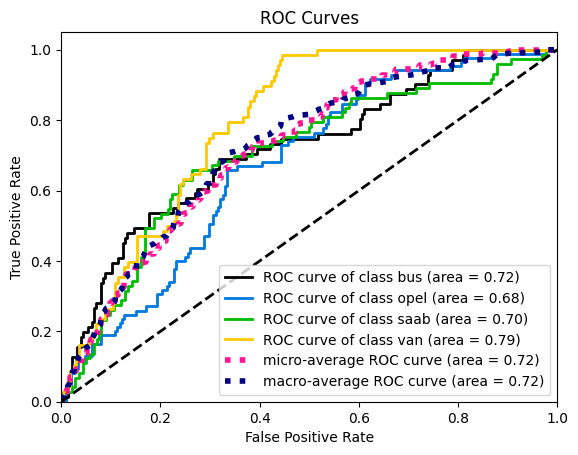

In [96]:
# Для тестовых данных PCA строим ROC-кривую
predicted_proba_decomposed = best_estimator_decomposed.predict_proba(X_test_decomposed)
scikitplot.metrics.plot_roc(y_test, predicted_proba_decomposed)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import scikitplot

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for max_depth
param_grid = {'max_depth': range(1, 21)}

# Use GridSearchCV to find the optimal max_depth with cross-validation
clf = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_decomposed, y_train)

# Get the best model and its parameters
best_dt_model = clf.best_estimator_
print("Best max_depth:", clf.best_params_)

Best max_depth: {'max_depth': 8}


In [99]:
# Predict and measure accuracy and F1 score on training data
y_pred_train = best_dt_model.predict(X_train_decomposed)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print(f"Training Accuracy: {accuracy_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.8324225865209471
Training F1 Score: 0.8282108007082712


In [100]:
y_pred_test = best_dt_model.predict(X_test_decomposed)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print(f"Test Accuracy: {accuracy_test}")
print(f"Test F1 Score: {f1_test}")

Test Accuracy: 0.4444444444444444
Test F1 Score: 0.4459241620888734


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

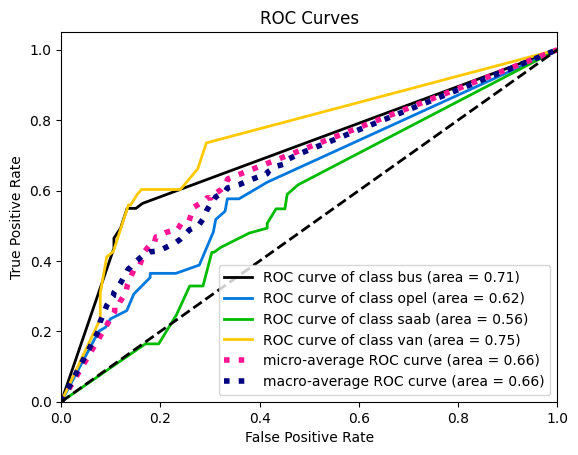

In [101]:
# Для тестовых данных PCA строим ROC-кривую
predicted_dt_model = best_dt_model.predict_proba(X_test_decomposed)
scikitplot.metrics.plot_roc(y_test, predicted_dt_model)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

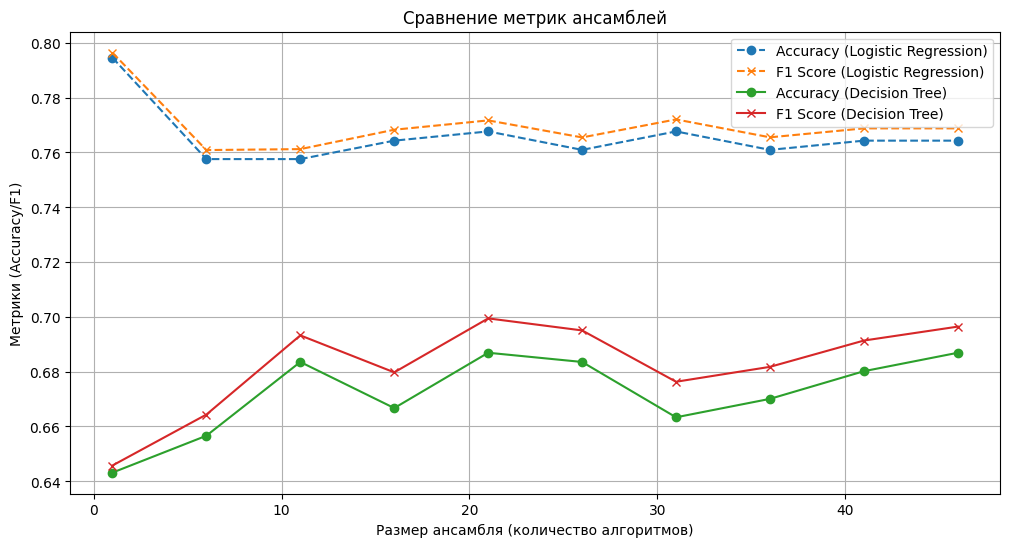

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Кодирование меток в числовой формат
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Масштабирование данных для логистической регрессии
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Оптимальные параметры моделей
optimal_tree_depth = 16
optimal_logistic_params = {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 500}  # Увеличен max_iter

# Функция для построения ансамбля
def bagging_ensemble(model, X_train, y_train, X_test, y_test, max_estimators, step):
    ensemble_sizes = np.arange(1, max_estimators + 1, step)
    accuracy_scores = []
    f1_scores = []

    # Генерация обучающих подмножеств с помощью бутстрэпа
    bootstrap_samples = [resample(X_train, y_train, random_state=i) for i in range(max_estimators)]

    for n_estimators in ensemble_sizes:
        predictions = []

        # Обучение n_estimators моделей на разных бутстрэп-наборах
        for i in range(n_estimators):
            X_subset, y_subset = bootstrap_samples[i]
            model_instance = model.fit(X_subset, y_subset)
            predictions.append(model_instance.predict(X_test))

        # Усреднение предсказаний
        predictions = np.array(predictions, dtype=np.float64)  # Преобразуем в числовой массив
        final_predictions = np.round(np.mean(predictions, axis=0)).astype(int)

        # Вычисление метрик
        accuracy_scores.append(accuracy_score(y_test, final_predictions))
        f1_scores.append(f1_score(y_test, final_predictions, average='weighted'))

    return ensemble_sizes, accuracy_scores, f1_scores

# Построение ансамблей логистических регрессий
logistic_model = LogisticRegression(**optimal_logistic_params)
log_sizes, log_accuracy, log_f1 = bagging_ensemble(
    logistic_model, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, max_estimators=50, step=5
)

# Построение ансамблей деревьев решений
tree_model = DecisionTreeClassifier(max_depth=optimal_tree_depth)
tree_sizes, tree_accuracy, tree_f1 = bagging_ensemble(
    tree_model, X_train, y_train_encoded, X_test, y_test_encoded, max_estimators=50, step=5
)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Графики для логистической регрессии
plt.plot(log_sizes, log_accuracy, label='Accuracy (Logistic Regression)', linestyle='--', marker='o')
plt.plot(log_sizes, log_f1, label='F1 Score (Logistic Regression)', linestyle='--', marker='x')

# Графики для деревьев решений
plt.plot(tree_sizes, tree_accuracy, label='Accuracy (Decision Tree)', linestyle='-', marker='o')
plt.plot(tree_sizes, tree_f1, label='F1 Score (Decision Tree)', linestyle='-', marker='x')

# Настройки графика
plt.title('Сравнение метрик ансамблей')
plt.xlabel('Размер ансамбля (количество алгоритмов)')
plt.ylabel('Метрики (Accuracy/F1)')
plt.legend()
plt.grid()
plt.show()


In [44]:
# Оптимальный размер ансамбля выбирается по точке, где метрики выходят на плато. По графикам это также около 15 (от 10 до 20)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

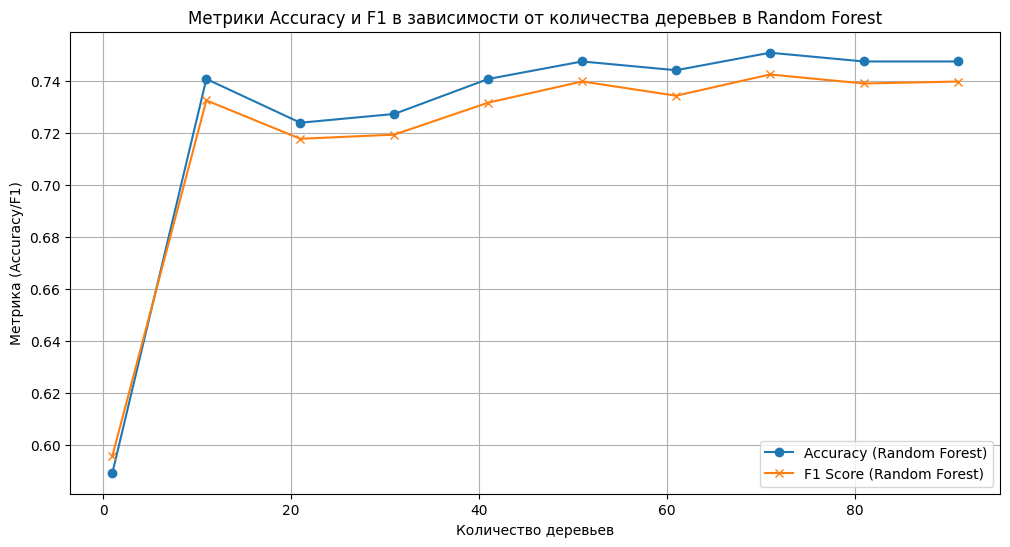

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Функция для анализа количества деревьев
def analyze_random_forest(X_train, y_train, X_test, y_test, max_trees=100, step=10):
    tree_counts = np.arange(1, max_trees + 1, step)
    accuracy_scores = []
    f1_scores = []

    for n_trees in tree_counts:
        rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)

        # Вычисление метрик
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    return tree_counts, accuracy_scores, f1_scores

# Анализ Random Forest
rf_tree_counts, rf_accuracy, rf_f1 = analyze_random_forest(
    X_train, y_train_encoded, X_test, y_test_encoded, max_trees=100, step=10
)

# Построение графиков
plt.figure(figsize=(12, 6))

# График Accuracy
plt.plot(rf_tree_counts, rf_accuracy, label='Accuracy (Random Forest)', marker='o')

# График F1
plt.plot(rf_tree_counts, rf_f1, label='F1 Score (Random Forest)', marker='x')

# Настройки графика
plt.title('Метрики Accuracy и F1 в зависимости от количества деревьев в Random Forest')
plt.xlabel('Количество деревьев')
plt.ylabel('Метрика (Accuracy/F1)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# тут явно около 10, но если нужно более точно, то 70

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [104]:
X_train_stacked = np.vstack((X_train_decomposed, X_train_decomposed[-1]))
y_train_stacked = np.hstack((y_train, y_train[-1]))
X_train_stacked.shape, y_train_stacked.shape

((550, 4), (550,))

In [106]:
splitted_train_data = np.split(X_train_stacked, 10)
splitted_train_y = np.split(y_train_stacked, 10)

In [107]:
splitted_train_data[0].shape, splitted_train_y[0].shape

((55, 4), (55,))

In [108]:
dataset_size = np.linspace(1, 10, 10, dtype=int)
regr_accuracy_list = []
tree_accuracy_list = []
frst_accuracy_list = []
regr_f1_list = []
tree_f1_list = []
frst_f1_list = []

for size in dataset_size:
    # create train dataset
    dataset = splitted_train_data[0]
    answers = splitted_train_y[0]
    for i in range(1, size):
        dataset = np.vstack((dataset, splitted_train_data[i]))
        answers = np.hstack((answers, splitted_train_y[i]))

    #fit data
    log_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
    decision_tree = DecisionTreeClassifier(max_depth=16)
    random_forest = RandomForestClassifier(n_estimators=15)
    log_model.fit(dataset, answers)
    decision_tree.fit(dataset, answers)
    random_forest.fit(dataset, answers)

    # predict and compute metrics
    regr_accuracy_list.append(sklearn.metrics.accuracy_score(y_test, log_model.predict(X_test_decomposed)))
    tree_accuracy_list.append(sklearn.metrics.accuracy_score(y_test, decision_tree.predict(X_test_decomposed)))
    frst_accuracy_list.append(sklearn.metrics.accuracy_score(y_test, random_forest.predict(X_test_decomposed)))
    regr_f1_list.append(sklearn.metrics.f1_score(y_test, log_model.predict(X_test_decomposed), average='weighted'))
    tree_f1_list.append(sklearn.metrics.f1_score(y_test, decision_tree.predict(X_test_decomposed), average='weighted'))
    frst_f1_list.append(sklearn.metrics.f1_score(y_test, random_forest.predict(X_test_decomposed), average='weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

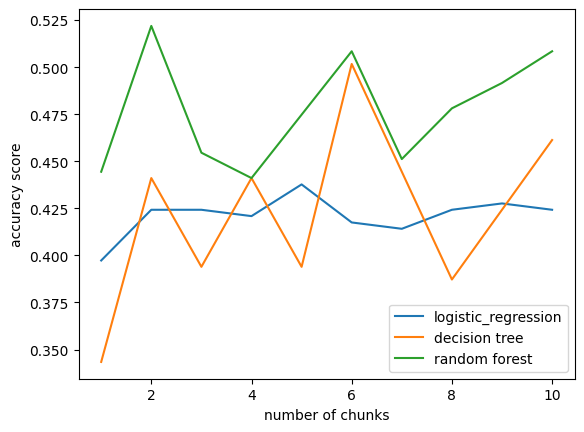

In [109]:
plt.plot(dataset_size, regr_accuracy_list, label='logistic_regression')
plt.plot(dataset_size, tree_accuracy_list, label='decision tree')
plt.plot(dataset_size, frst_accuracy_list, label='random forest')
plt.xlabel('number of chunks')
plt.ylabel('accuracy score')
plt.legend()

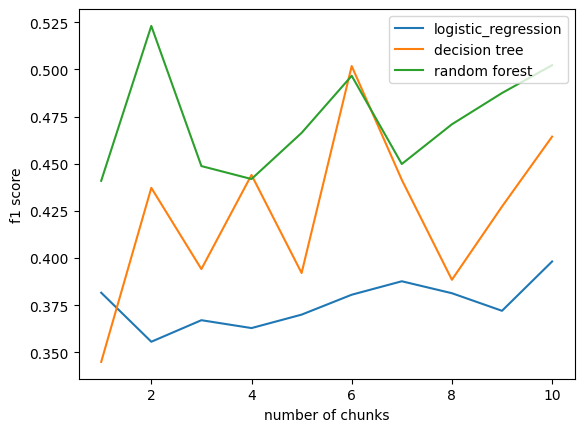

In [110]:
plt.plot(dataset_size, regr_f1_list, label='logistic_regression')
plt.plot(dataset_size, tree_f1_list, label='decision tree')
plt.plot(dataset_size, frst_f1_list, label='random forest')
plt.xlabel('number of chunks')
plt.ylabel('f1 score')
plt.legend()


**Анализ результатов на графиках**

**График Accuracy (Точность):**

Random Forest (зелёная линия) демонстрирует наилучшую точность по сравнению с другими моделями на всех этапах.

- Точность колеблется вокруг 0.5–0.52, что показывает стабильное и высокое качество предсказаний.

- Колебания могут быть вызваны случайностью в данных или процессе обучения.

Decision Tree (оранжевая линия) показывает средние результаты:

- Точность выше, чем у логистической регрессии, но ниже, чем у Random Forest.
- Это ожидаемо, так как одиночное дерево решений не так устойчиво к переобучению, как ансамбль деревьев.

Logistic Regression (синяя линия) имеет наихудшие результаты по точности:

- Значения варьируются от 0.35 до 0.4, что гораздо ниже других моделей.
- Это указывает на ограниченные возможности линейной модели на данных, где требуется нелинейное разделение.

**График F1 Score:**

Random Forest снова показывает лучшие результаты (зелёная линия):

- Значения F1-метрики достигают 0.5–0.52, аналогично графику точности.
- Это подтверждает, что Random Forest сбалансированно обрабатывает все классы.

Decision Tree демонстрирует F1 Score чуть ниже, чем у Random Forest:

- Колебания значений указывают на нестабильность одиночного дерева решений.
- Значения F1 составляют около 0.45–0.48.

Logistic Regression имеет наименьший F1 Score (синяя линия):

- Значения около 0.35–0.4, что аналогично графику точности.
- Низкий F1 указывает на трудности модели с классификацией редких или сложных классов.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

Best number of estimators: 91
XGBoost Accuracy: 0.7542
XGBoost F1 Score: 0.7487


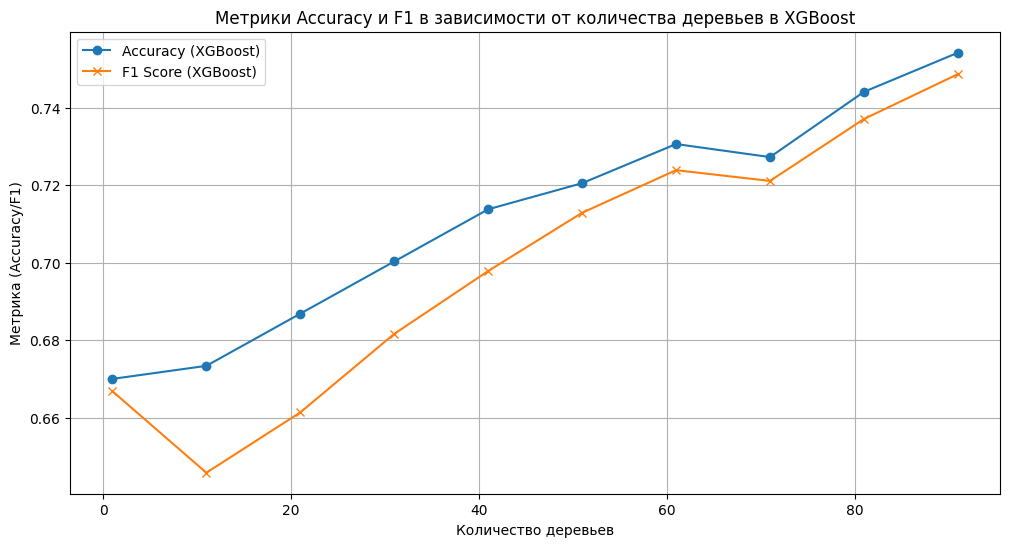

In [113]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Функция для анализа XGBoost с разным количеством деревьев
def analyze_xgboost(X_train, y_train, X_test, y_test, max_trees=100, step=10):
    tree_counts = np.arange(1, max_trees + 1, step)
    accuracy_scores = []
    f1_scores = []

    for n_trees in tree_counts:
        # Создание модели XGBoost с n_estimators равным текущему количеству деревьев
        xgb_model = xgb.XGBClassifier(n_estimators=n_trees, random_state=42, learning_rate=0.1, max_depth=3)
        xgb_model.fit(X_train, y_train)

        # Прогнозирование на тестовом наборе
        y_pred = xgb_model.predict(X_test)

        # Вычисление метрик
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    return tree_counts, accuracy_scores, f1_scores

# Анализ XGBoost
xgb_tree_counts, xgb_accuracy, xgb_f1 = analyze_xgboost(
    X_train, y_train_encoded, X_test, y_test_encoded, max_trees=100, step=10
)

# Нахождение лучшего количества деревьев
best_n_estimators = xgb_tree_counts[np.argmax(xgb_accuracy)]
best_accuracy = max(xgb_accuracy)
best_f1 = max(xgb_f1)

# Вывод лучших значений
print(f"Best number of estimators: {best_n_estimators}")
print(f"XGBoost Accuracy: {best_accuracy:.4f}")
print(f"XGBoost F1 Score: {best_f1:.4f}")

# Построение графиков
plt.figure(figsize=(12, 6))

# График Accuracy
plt.plot(xgb_tree_counts, xgb_accuracy, label='Accuracy (XGBoost)', marker='o')

# График F1
plt.plot(xgb_tree_counts, xgb_f1, label='F1 Score (XGBoost)', marker='x')

# Настройки графика
plt.title('Метрики Accuracy и F1 в зависимости от количества деревьев в XGBoost')
plt.xlabel('Количество деревьев')
plt.ylabel('Метрика (Accuracy/F1)')
plt.legend()
plt.grid()
plt.show()



